# Prediction using Supervised ML

**Author:** P.Nishith Reddy

**Importing required libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

**Reading CSV file**

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

**Checking if dataset contains any null or duplicate values.**

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Plotting the data points.**

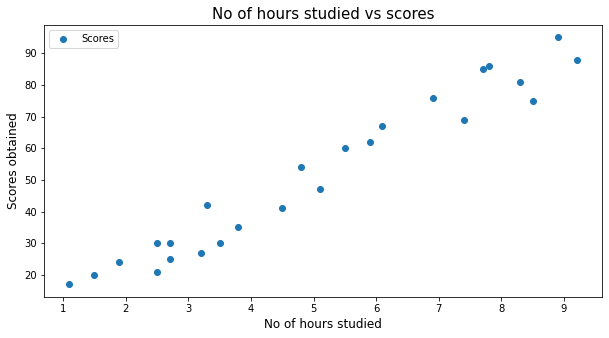

In [8]:
plt.figure(figsize = [10,5])
plt.scatter(x = df['Hours'],y = df['Scores'], label='Scores')
plt.title("No of hours studied vs scores" , fontsize = 15)
plt.xlabel("No of hours studied", fontsize = 12)
plt.ylabel("Scores obtained", fontsize = 12);
plt.legend();

Mostly our data points are linear in nature, so we can use linear regression model to predict the scores.

**Plotting correlation matrix**

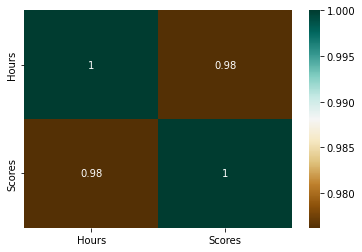

In [17]:
c = df.corr()
sns.heatmap(c,cmap = 'BrBG',annot = True);

From the above plot we can tell that Scores and Hours are highly correlated and correlation value is 0.95.

**Splitting data into test data and train data.**

In [9]:
y = df['Scores']
X = df.drop(['Scores'],axis = 1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

**Training model**

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

**Plotting regression line for the train data.** 

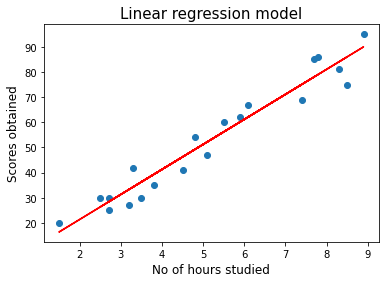

In [12]:

plt.scatter(X_train, y_train)
plt.title('Linear regression model',fontsize = 15)
plt.xlabel("No of hours studied", fontsize = 12)
plt.ylabel("Scores obtained", fontsize = 12)
plt.plot(X_train,regressor.predict(X_train),color = 'red');

**Making a dataframe of acutal and predicted scores of test data.**

In [13]:
y_pred = regressor.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred_df

,Actual,Predicted
14,17,12.442587
0,21,26.359448
17,24,20.395079
6,88,92.961570
23,76,70.098155


**Predicting the score of a student who study for 9.25hrs/day.**

In [14]:
hours = 9.25
pred_score = regressor.predict([[hours]])
print(f"If a student study for {hours}hrs/day then the predicted score is {pred_score[0]}")

If a student study for 9.25hrs/day then the predicted score is 93.45860055685802


**Evaluating the model**

In [15]:
print("Training score is :",regressor.score(X_train, y_train))
print("R2 score is :",r2_score(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred)) 

Training score is : 0.9423348138802985
R2 score is : 0.9735538080811826
Mean Absolute Error: 4.877039354964483
